In [532]:
import random
import math
import random
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import scipy.integrate   as integrate
import seaborn           as sns
from scipy.integrate import quad, quadrature
from scipy           import stats
%matplotlib inline
%precision 4

'%.4f'

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-live of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [533]:
'''
p(0s) = 1 - 1      = 0   
p(1s) = 1 - 2^(-1/tau) 
p(2s) = 1 - 2^(-2/tau) 
...
p(infinito) = 1 - 0 = 1
'''

'\np(0s) = 1 - 1      = 0   \np(1s) = 1 - 2^(-1/tau) \np(2s) = 1 - 2^(-2/tau) \n...\np(infinito) = 1 - 0 = 1\n'

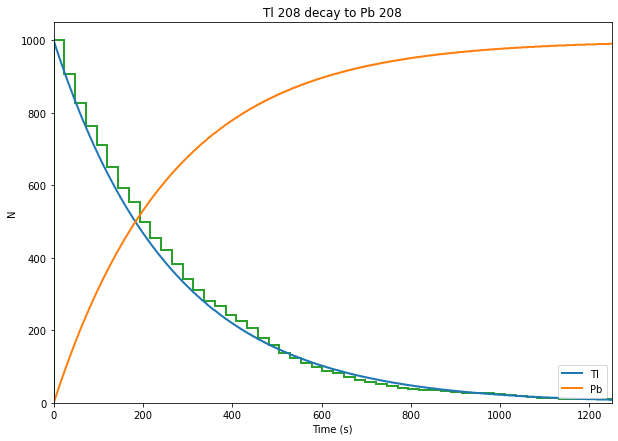

In [534]:
N       = 1000
n_steps = 1250
T_half  = 3.052 * 60 # convert in seconds

#probability of decay
def p( t, tau = T_half ):
    return pow( 2, - t / tau )

# inverse transform method
def p2( t, tau = T_half ):
    return (-tau* np.log2( 1 - t ))

t  = np.arange( n_steps )
Pb = np.array(  N * (1 - p(t)), dtype = int )
Tl = np.array(  N * p(t),       dtype = int )

plt.figure( figsize = ( 10, 7 ))
plt.plot( t, Tl, linewidth = 2, 
                 label     = 'Tl' )
plt.plot( t, Pb, linewidth = 2, 
                 label     = 'Pb' )
u = np.random.random( size = (1000,))
t = np.array(  (p2(u)), dtype = int )

plt.hist( t,  
          histtype   = 'step', 
          bins       = 80, 
          linewidth  = 2, 
          cumulative = -1, 
          facecolor  = 'blue')

plt.xlim( 0, n_steps )
plt.title( 'Tl 208 decay to Pb 208' )
plt.legend( loc = 'best' )
plt.xlabel( 'Time (s)' )
plt.ylabel( 'N' )
plt.show( )


2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [535]:
a0        = 5.29177210903 * 10**( -11 )     #m
sigma     = a0/100
mu        = [0,0]
E         = 7.7 * 1.602176634 * 10**( -13 ) #J
Z         = 79
e         = 1.602e-19 
epsilon_0 = 8.85e-12 #F/m


cov = [[sigma**2, 0],
       [0, sigma**2]]

X  = np.random.multivariate_normal(mu, cov, 10000) #beam 2d gaussian

b = (X[:,0]**2+X[:,1]**2)**0.5
# tg of pi/4 = 1 quindi cerco la frazione dove la formula è più grande di 1 o più piccolo di -1
f = (Z*e*e)/(2*np.pi*epsilon_0*E*b)

bounce_back = f[abs(f) > 1].shape[0]/f.shape[0]
print( 'The fraction of particles that "bounce back is: ', bounce_back )


The fraction of particles that "bounce back is:  0.0012


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

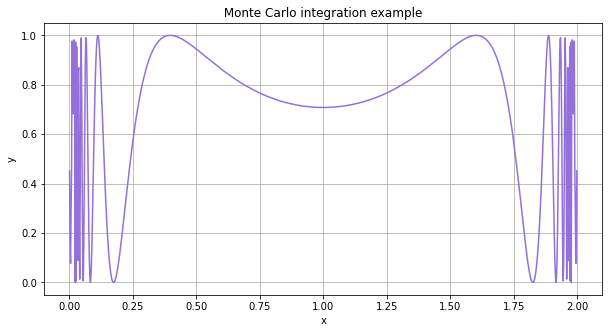

In [536]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

x = np.linspace( 0.001, 1.999, 1000)

plt.figure( figsize = ( 10, 5 ))
plt.plot( x, f(x), 
          color = 'mediumpurple')

plt.grid( visible = True , axis = 'both' )
plt.xlabel('x')
plt.ylabel('y')
plt.title(' Monte Carlo integration example ')
plt.show( )


In [537]:
#hit/miss
N = 100000
A = 2 
k = 0
s = 0

for i in range ( N ):
    x = 2*np.random.random( ) 
    y =   np.random.random( )
    if y < f( x ): 
        k += 1
    s = s + f( x )
    
I_1 = (A * k)/ N #hit/miss
I_2 = (2 * s)/ N #mean value method
I_real, err = quad( f , 0.0017, 1)

err_1 = np.abs((I_1-(I_real*2))/(I_real*2))
err_2 = np.abs((I_2-(I_real*2))/(I_real*2))
print( 'Hit/miss method:   I = %.5f +/- %.5f'%(I_1, err_1),
       '\nMean value method: I = %.5f +/- %.5f'%(I_2, err_2))

Hit/miss method:   I = 1.45160 +/- 0.00131 
Mean value method: I = 1.45206 +/- 0.00163


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



The area of a cirle of unit radius is 3.1371


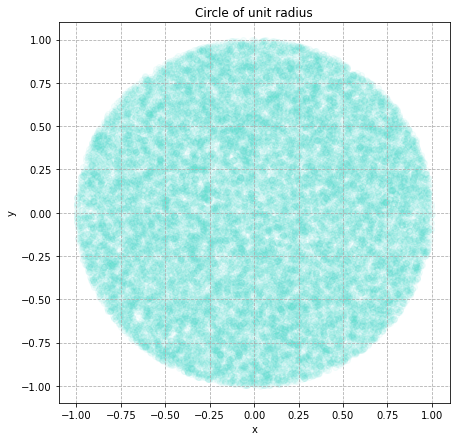

In [538]:
N = 30000
A = 2 * 2
k = 0
X, Y = [], []

for i in range ( N ):
    signx = np.random.randint( 2 )
    signy = np.random.randint( 2 )
    if ( signx == 0 ):
        signx = -1
    if ( signy == 0 ):
        signy = -1
    x = signx * np.random.random( ) 
    y = signy * np.random.random( ) 
    if ( x**2 + y**2 ) < 1: 
        X.append( x )
        Y.append( y )
        k += 1
I = (A * k)/ N 
print( 'The area of a cirle of unit radius is %.4f'%I )

plt.figure( figsize = ( 7, 7 ))

plt.scatter( X, Y, 
             marker = 'o', 
             alpha  = 0.05,
             color  = 'turquoise')

plt.grid( visible   = True ,   axis      = 'both', 
          which     = 'major', linestyle = '--', 
          linewidth = 0.8 )
plt.xlabel( 'x' )
plt.ylabel( 'y' )
plt.title(  'Circle of unit radius' )
plt.show( )


In [539]:
#10D
N    = 100000
dim  = 10
A    = 2**dim
k    = 0

for i in range ( N ):
    sign = np.random.randint( 2 , size = dim )
    sign = [ -1 if x == 0 else x for x in sign ]
    x    = np.random.random( size = dim )
    x    = x*sign
    if ( np.sum(x**2) ) < 1: 
        k += 1

I = (A * k)/ N 
print( 'The volume of a 10D sphere of unit radius is %.4f'%I )


The volume of a 10D sphere of unit radius is 2.3450


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

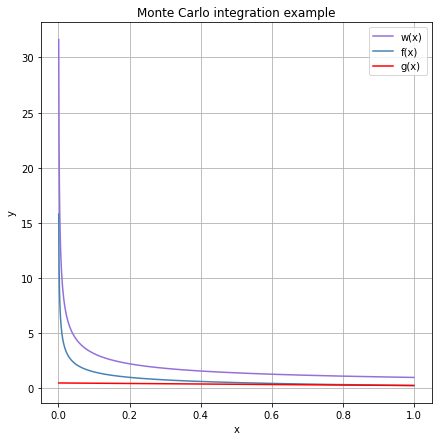

In [541]:
def f ( x ):
    return np.sqrt( 1/ x )/( np.exp( x ) + 1 )

def w ( x ):
    return np.sqrt( 1/x )

def g ( x ):
    return 1/( np.exp( x ) + 1 )
    #return f( x )/w( x ) 

x = np.linspace( 0.001, 0.999, 1000)

plt.figure( figsize = ( 7, 7 ))
plt.plot( x, w(x), color = 'mediumpurple', label = 'w(x)' )
plt.plot( x, f(x), color = 'steelblue',    label = 'f(x)' )
plt.plot( x, g(x), color = 'red',          label = 'g(x)' )
plt.grid( visible = True , 
          axis    = 'both' )
plt.xlabel('x')
plt.ylabel('y')
plt.title( 'Monte Carlo integration example')
plt.legend( loc = 'best' )
plt.show( )

In [544]:
N = 1000000
A = w( 0.001 ) * 0.998
k = 0
n = 0

for i in range ( N ):
    x =      np.random.random( ) 
    y = 30 * np.random.random( )
    if (x > 0.001):
        n = n + 1
        if y < w( x ): 
            k += 1

# Area under w(x) with the hit/miss method
I_1 = (A * k) / n 


In [545]:
S = 0
n = 0

def invsq_icdf(z):
    return (z**2)

for i in range ( N ):
    x   = np.random.random( ) 
    if (x > 0.001):
        y=invsq_icdf(x)
        S += f( y ) / w( y )
        n = n + 1
        
I = S * I_1 / n
print('The area under f(x) between 0 and 1 is: ',I )

The area under f(x) between 0 and 1 is:  0.8562988613855897
